# Group Exercise – Chapter 3 Time Series Analysis

## Dataset:- for this exercise we will be using a real world dataset of "Daily Minimum Temperatures in Melbourne"

## 1.Plotting the Time Series

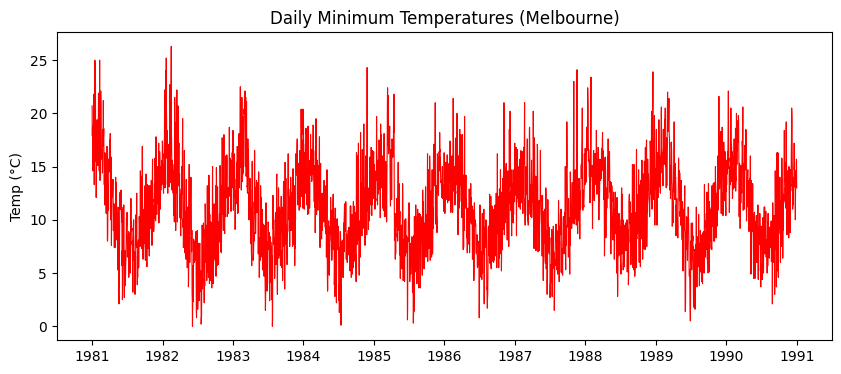

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a reliable public dataset directly
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
series = df['Temp']

# Plot Raw Data
plt.figure(figsize=(10, 4))
plt.plot(series, color='red', linewidth=0.8)
plt.title('Daily Minimum Temperatures (Melbourne)')
plt.ylabel('Temp (°C)')
plt.show()

## 2.Time Series Decomposition
Decompose into:

-Trend

-Seasonality

-Residual (noise)

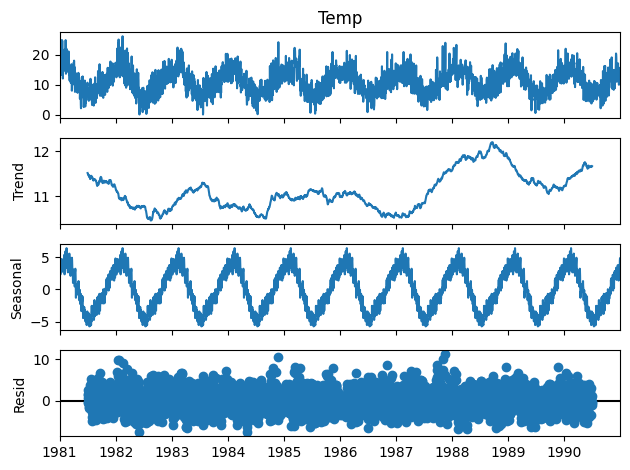

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition (period=365 for daily data)
result = seasonal_decompose(series, model='additive', period=365)
result.plot()
plt.show()

## 3.Trend Estimation using Moving Average

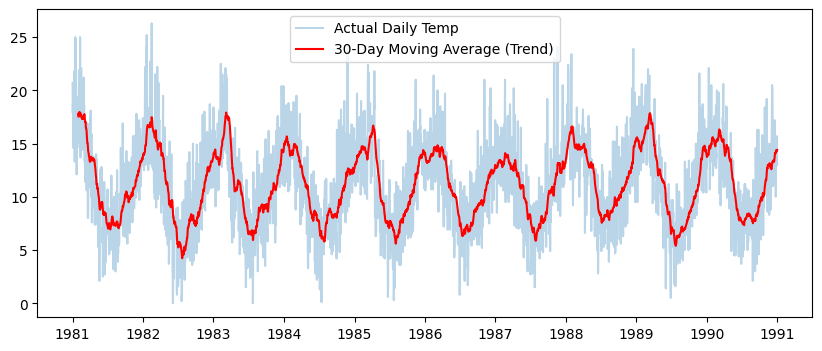

In [6]:
moving_avg = series.rolling(window=30).mean()

plt.figure(figsize=(10, 4))
plt.plot(series, alpha=0.3, label='Actual Daily Temp')
plt.plot(moving_avg, color='red', label='30-Day Moving Average (Trend)')
plt.legend()
plt.show()

## 4. Applying Forecasting Model (AR)

In [17]:
from statsmodels.tsa.ar_model import AutoReg

# Split into train (9 years) and test (last 1 year)
train, test = series[:-365], series[-365:]

# Fit AR model with 7-day lag (captures weekly patterns)
model = AutoReg(train, lags=7).fit()
predictions = model.predict(start=len(train), end=len(series)-1)

e:\Python codes\ML&STATS_group_exercise\Group-Exercise-Chapter-3-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Python codes\ML&STATS_group_exercise\Group-Exercise-Chapter-3-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Python codes\ML&STATS_group_exercise\Group-Exercise-Chapter-3-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Python codes\ML&STATS_group_exercise\G

## 5.Visualization
-   Original vs forecasted values

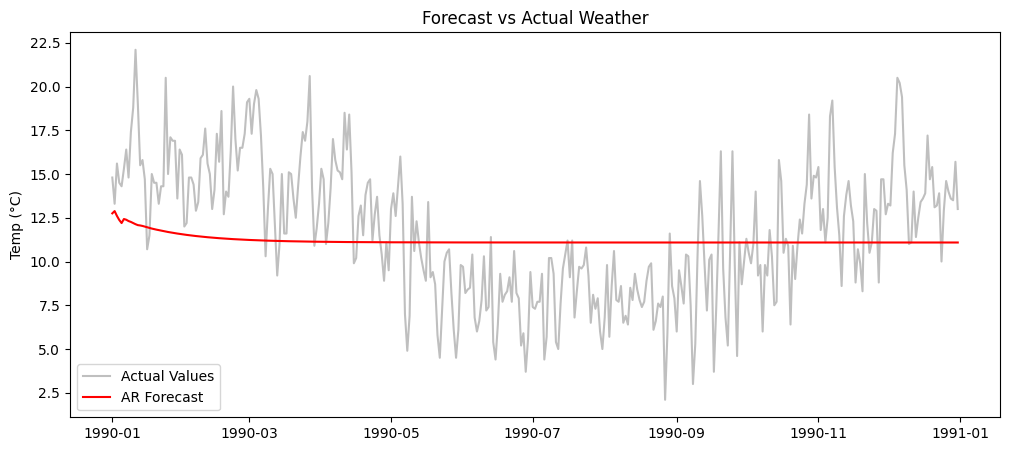

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual Values', color='gray', alpha=0.5)
plt.plot(test.index, predictions, label='AR Forecast', color='red', linewidth=1.5)
plt.title('Forecast vs Actual Weather')
plt.ylabel('Temp (°C)')
plt.legend()
plt.show()